In [8]:
text = 'You say goodbye and I say hello.'

In [9]:
text = text.lower() # 소문자 변환

In [10]:
text = text.replace('.',' .')

In [11]:
text

'you say goodbye and i say hello .'

In [12]:
words = text.split(' ')

In [13]:
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [14]:
import re

In [16]:
re.split('(\W+)?',text)

['',
 None,
 'y',
 None,
 'o',
 None,
 'u',
 ' ',
 '',
 None,
 's',
 None,
 'a',
 None,
 'y',
 ' ',
 '',
 None,
 'g',
 None,
 'o',
 None,
 'o',
 None,
 'd',
 None,
 'b',
 None,
 'y',
 None,
 'e',
 ' ',
 '',
 None,
 'a',
 None,
 'n',
 None,
 'd',
 ' ',
 '',
 None,
 'i',
 ' ',
 '',
 None,
 's',
 None,
 'a',
 None,
 'y',
 ' ',
 '',
 None,
 'h',
 None,
 'e',
 None,
 'l',
 None,
 'l',
 None,
 'o',
 ' .',
 '',
 None,
 '']

In [17]:
word_to_id = {}
id_to_word = {}

In [18]:
for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [19]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [20]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [21]:
id_to_word[1]

'say'

In [22]:
word_to_id['hello']

5

In [23]:
import numpy as np

In [24]:
corpus = [word_to_id[w] for w in words] # 내포(comprehension) 리스트나 딕셔너리 등의 반복문 처리를 간단하게 쓰기 위한 기법 
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [31]:
text = 'You say goodbye and I say hello.'

In [32]:
corpus, word_to_id, id_to_word = preprocess(text)

In [33]:
corpus

[0, 1, 2, 3, 4, 1, 5, 6]

In [34]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [35]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [1]:
import sys
import os
sys.path.append('..') # 현재 디렉토리 sys의 path에 넣어줌. path에 있는 모듈을 불러와 사용할 수 있음 

In [1]:
import numpy as np

In [2]:
from common.util import preprocess, create_co_matrix, ppmi, cos_similarity, most_similar

In [3]:
text = 'You say goodbye and I say hello.'

In [4]:
corpus, word_to_id, id_to_word = preprocess(text)

In [5]:
print(corpus)

[0, 1, 2, 3, 4, 1, 5, 6]


In [6]:
print(id_to_word)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [7]:
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

In [8]:
c0 = C[word_to_id['you']] #'you'의 단어 벡터
c1 = C[word_to_id['i']] # i의 단어 벡터 

In [9]:
print(cos_similarity(c0,c1)) # 코사인 유사도 값은 -1에서 1 사이이므로, 이 값은 비교적 높다(유사성이 크다)고 말할 수 있습니다. 

0.7071067758832467


argsort() : 넘파이 배열의 원소들을 오름차순으로 정렬하고, 반환된 배열에 담김 원소들은 원래 배열의 인덱스에 해당한다

In [10]:
x = np.array([100, -20, 2])
x.argsort()

array([1, 2, 0], dtype=int64)

In [11]:
(-x).argsort()

array([0, 2, 1], dtype=int64)

i와 you 모두 인칭대명사이므로 둘이 비슷하다는 건 납득이 되지만, goodbye와 hello의 코사인 유사도가 높다는 것은 우리의 직관과는 멀다. 말뭉치의 크기가 너무 작다는 것이 원인.

In [12]:
most_similar('you', word_to_id, id_to_word, C, top=5) 


[query] you
 goodbye: 0.7071067758832467
 i: 0.7071067758832467
 hello: 0.7071067758832467
 say: 0.0
 and: 0.0


[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01 -1.110e-16 -4.441e-16 -1.205e-01  0.000e+00 -9.323e-01
 -1.086e-16]


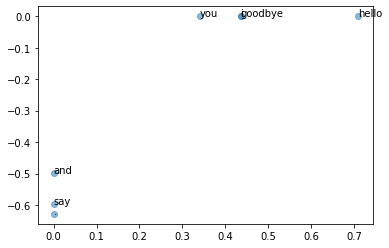

In [1]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print(C[0])
print(W[0])
print(U[0])

# 플롯
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

In [1]:
# coding: utf-8
import sys
sys.path.append('..')
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

Done
말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [2]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb


window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')
try:
    # truncated SVD (빠르다!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    # SVD (느리다)
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

동시발생 수 계산 ...
PPMI 계산 ...


C:\Users\Itshony\Desktop\머신러닝\밑바닥부터시작하는딥러닝2\common\util.py:65: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
C:\Users\Itshony\Desktop\머신러닝\밑바닥부터시작하는딥러닝2\common\util.py:65: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)


1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
calculating SVD ...

[query] you
 i: 0.6452074646949768
 we: 0.6109094023704529
 do: 0.5525143146514893
 someone: 0.54